# PS CIS IEE UnB - Fase I

In [1676]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.ensemble import RandomForestClassifier

## Questão 1
### Existem valores faltantes ou outliers no dataset? Se sim, como você abordaria o tratamento dessas inconsistências? Explique as técnicas que utilizaria para lidar com essas questões.


In [1677]:
df_diabetes = pd.read_csv("diabetes.csv")

In [1678]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,627.0,50,1
1,1,85.0,66.0,29.0,0.0,26.6,351.0,31,0
2,8,183.0,64.0,0.0,0.0,23.3,672.0,32,1
3,1,89.0,66.0,23.0,94.0,28.1,167.0,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2288.0,33,1


In [1679]:
df_diabetes.shape

(768, 9)

In [1680]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   764 non-null    float64
 2   BloodPressure             748 non-null    float64
 3   SkinThickness             758 non-null    float64
 4   Insulin                   765 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


##### Com base nos valores acima, é possível notar que as colunas algumas colunas possumem valores faltantes, pois o esperado é que todas as colunas tivessem 768 valores não nulos.

##### Uma das formas de tratar esses valores é escluindo essas linhas do conjunto de dados a ser utilizado na análise.
##### Pode-se também preencher com um valor fixo, um valor médio relacionado a determinada feature, e por interpolação.
##### O escolhido foi o dropna, pois no caso poucas linhas se apresentam como nulas, o que provavelmente não trará grandes prejuízos à analise dos dados

In [1681]:

df_diabetes = df_diabetes.dropna()

## Questão 2
### Como as principais variáveis (Glucose, BloodPressure, BMI, etc.) estão distribuídas? Utilize histogramas e boxplots para representar visualmente essas distribuições e analise as características de cada uma

In [1682]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,3.834722,120.962500,68.720833,20.687500,79.601389,32.016528,424.797097,33.240278,0.350000
std,3.347997,32.386487,19.418060,15.917847,115.634986,7.851279,339.546312,11.795749,0.477301
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,204.000000,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,24.000000,32.000000,336.500000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,126.250000,36.500000,587.250000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2329.000000,81.000000,1.000000


In [1683]:
def analise_variable(variable):
    sns.displot(df_diabetes, x = variable, kde= True)
    plt.title(f'Distribuição de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequência')
    plt.show()

    sns.boxplot(x=df_diabetes[variable])
    plt.title(f'Boxplot de {variable}')
    plt.xlabel(variable)
    plt.show()

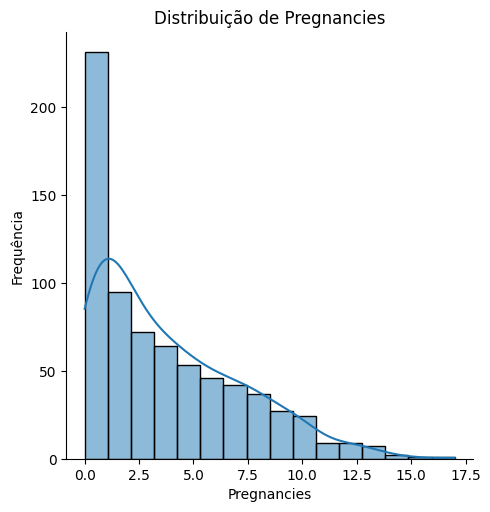

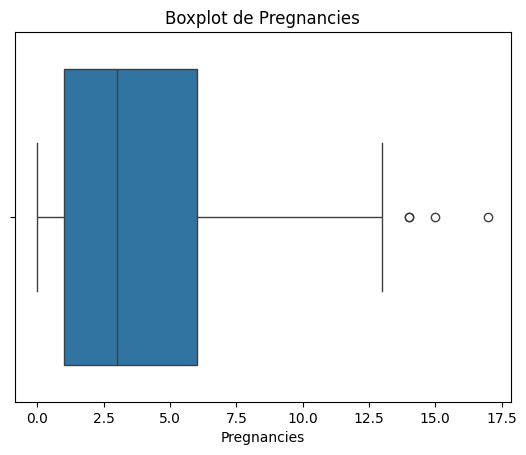

In [1684]:
"""
Observa-se que a variavel 'Pregnancies' apresentam distribuição 
parecida à uma distribuição exponêncial. Com uma média dos valores de 
gravidez relativamente baixa (aproximadamente 3.34) e desvio padrão
relativamente baixo.
"""
analise_variable("Pregnancies")

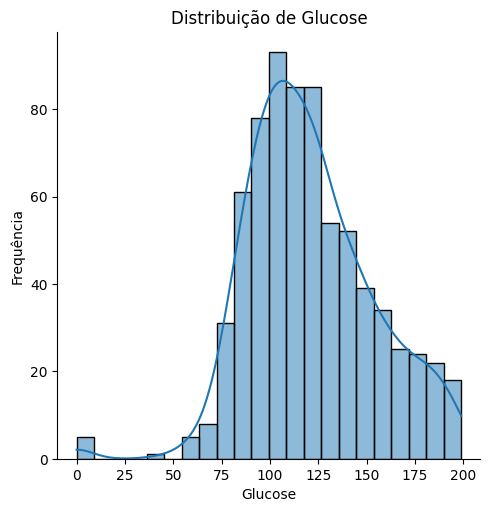

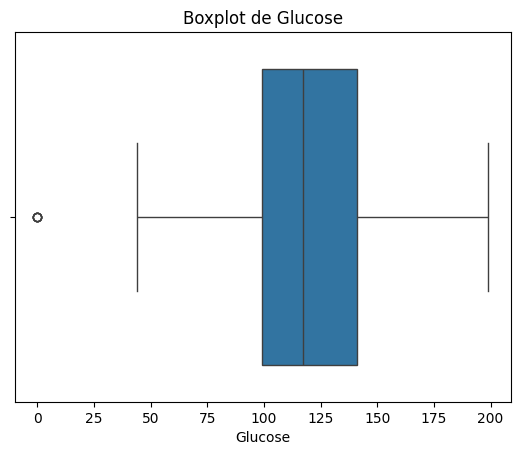

In [1685]:
"""
Observa-se que a variável "Glucose" apresenta uma distribuição com cauda 
à direita e presença de alguns outliers. A média situa-se em torno 
de valores elevados (próximo de 120 a 130), enquanto o desvio padrão
indica alta variabilidade, evidenciando casos com níveis muito altos
de glicose.
"""
analise_variable("Glucose")

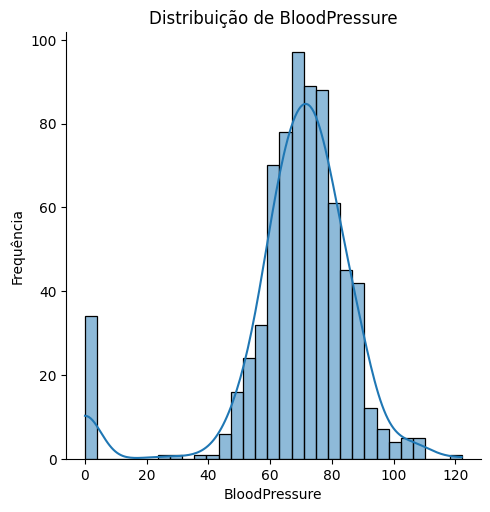

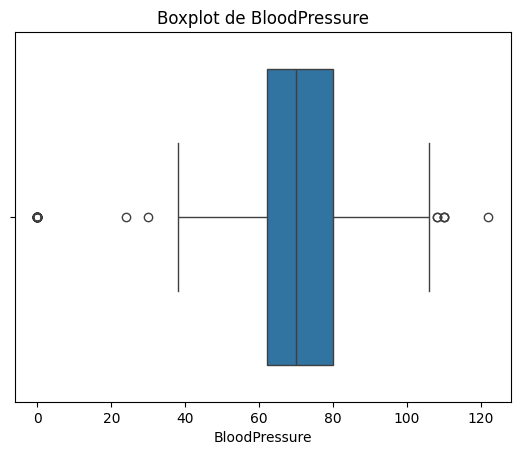

In [1686]:
"""
Observa-se que a variável "BloodPressure" exibe uma distribuição mais
concentrada, com a maioria dos valores próximos à média (por volta
de 70 mmHg) e alguns outliers. O desvio padrão moderado sugere 
variação não muito grande na pressão sanguínea para de grande 
parte dos pacientes.
"""
analise_variable("BloodPressure")

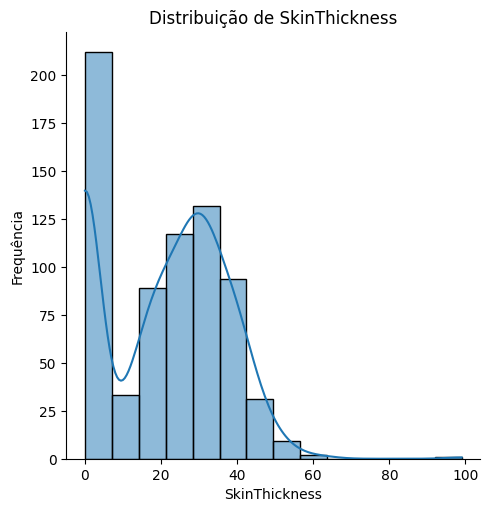

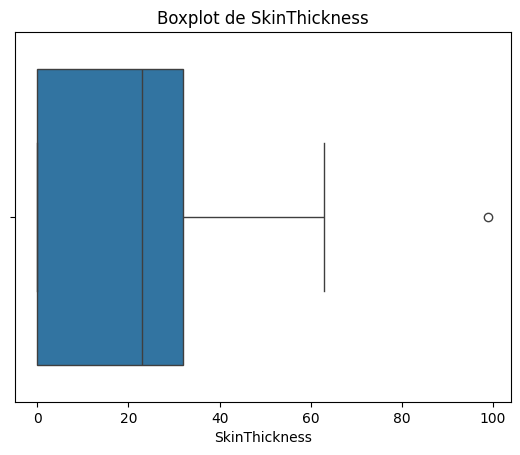

In [1687]:
"""
Observa-se que a variável "SkinThickness" apresenta uma distribuição enviesada
com concentração de valores menores e alguns picos altos.
Essa dispersão sugere possível presença de outliers, 
onde a média baixa acompanhada de um desvio padrão
 elevado pode indicar inconsistências ou dificuldade na medição.
"""
analise_variable("SkinThickness")

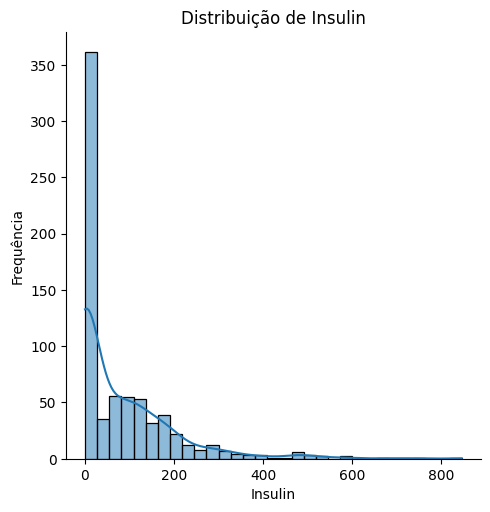

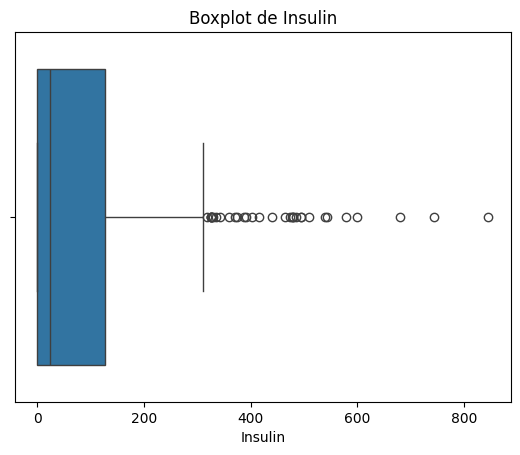

In [1688]:
"""
Observa-se que a variável "Insulin" possui distribuição bem
dispersa, com valores que variam de baixos a muito altos.
A grande variabilidade (alto desvio padrão)
mostra a presença de outliers, o que pode demandar
mais estudo ou tratamento específico.
"""
analise_variable("Insulin")

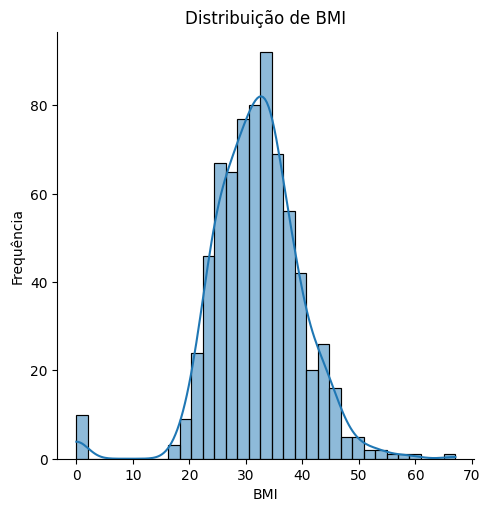

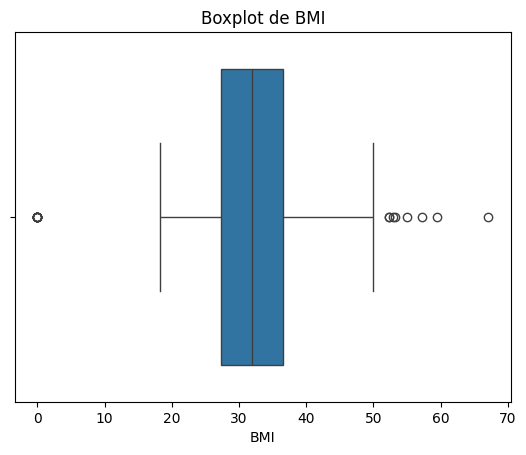

In [1689]:
"""
Observa-se que a variável "BMI" apresenta uma distribuição relativamente
simétrica, embora com alguns outliers. A média concentra-se em
torno de valores moderados a altos (aproximadamente 30 a 33), e o desvio padrão sugere
que, apesar de certa variabilidade, a maioria dos pacientes tem IMC
próximo da média observada.
"""
analise_variable("BMI")

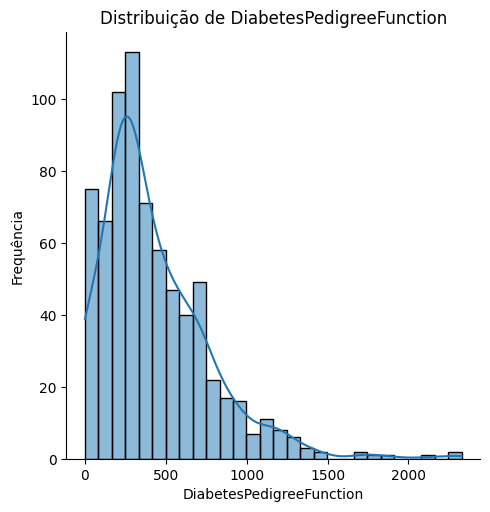

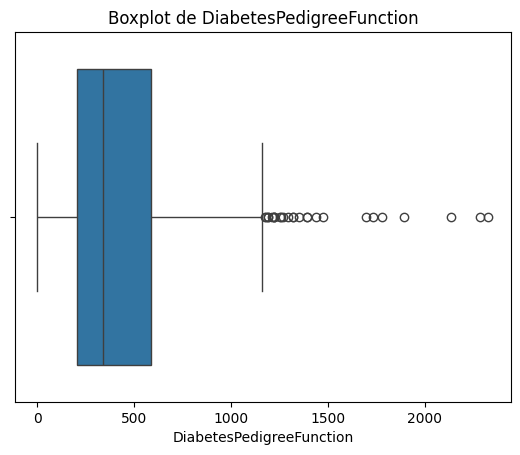

In [1690]:
"""
Observa-se que a variável "DiabetesPedigreeFunction" apresenta uma distribuição levemente
inclinada à direita, com a maioria dos valores concentrados em uma faixa
intermediária. Tanto a média quanto o desvio padrão refletem uma variabilidade
moderada, representando a influência do histórico familiar de diabetes de
forma sutil.
"""

analise_variable("DiabetesPedigreeFunction")

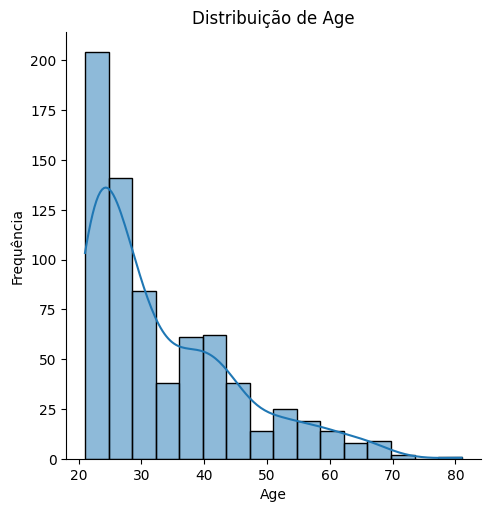

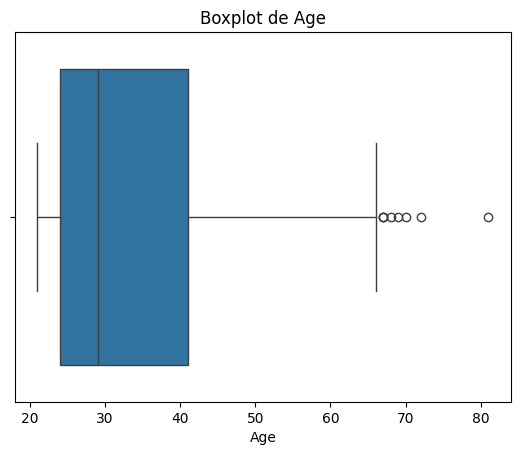

In [1691]:
"""
Observa-se que a variável "Age" apresenta uma distribuição 
que aparenta ter mais jovens a idosos.
"""

analise_variable("Age")

## Questão 3
### Existe uma correlação entre a idade dos indivíduos e a presença de diabetes? Realize uma análise estatística (como teste de correlação) e utilize gráficos (como scatter plot ou boxplot) para ilustrar essa relação.


In [1692]:
def correlation_test(x: str, y: str) -> None:
  Sx = 0
  Sy = 0
  x_mean = df_diabetes[x].mean()
  y_mean = df_diabetes[y].mean()
  cov_xy = 0


  for (index, row) in df_diabetes.iterrows():
    cov_xy+= (row[x] - x_mean) * (row[y] - y_mean)
    Sx+= (row[x] - x_mean)**2
    Sy+= (row[y] - y_mean)**2

  print(f"Correlação entre {x} e {y}: {cov_xy/np.sqrt(Sx*Sy):.5f}")

In [1693]:
correlation_test('Age', 'Outcome')

Correlação entre Age e Outcome: 0.21923


Text(0.5, 1.0, 'Distribuição da Idade por Diagnóstico de Diabetes')

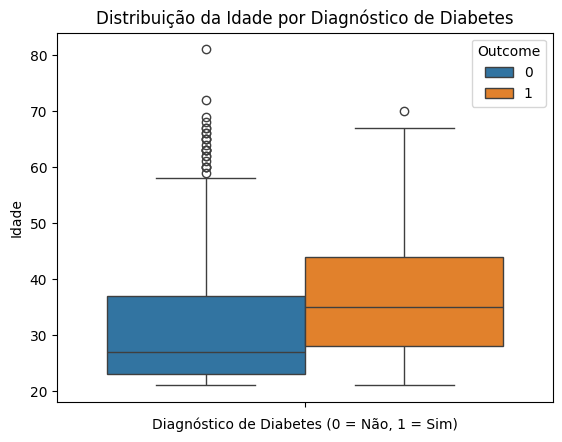

In [1694]:
sns.boxplot(data=df_diabetes, hue="Outcome", y="Age", )
plt.xlabel("Diagnóstico de Diabetes (0 = Não, 1 = Sim)")
plt.ylabel("Idade")
plt.title("Distribuição da Idade por Diagnóstico de Diabetes")

#### Como conclusão do teste de correlação, e como pode ser observado pelo gráfico, a idade e a ocorrência de casos de diabetes têm uma correlação positiva fraca, ou seja, quanto maior a idade, mais provavel é que o caso analisado possa apresentar diabetes.

## Questão 4
### Quais variáveis apresentam maior correlação com a presença de diabetes? Quais variáveis parecem ser as mais indicativas da presença de diabetes?


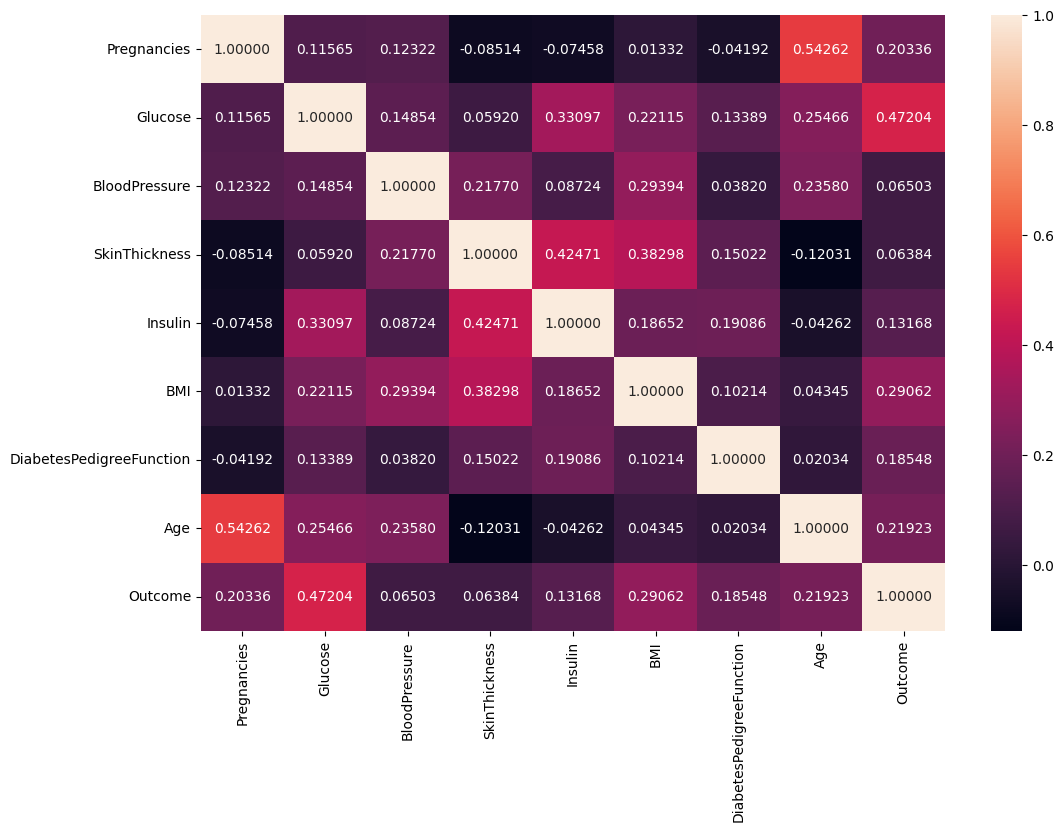

In [1695]:
plt.figure(figsize=(12, 8))  
sns.heatmap(df_diabetes.corr(), annot=True, fmt=".5f")
plt.show()  

##### Conforme os dados acima, as variáveis que parecem estar mais ligada com as ocorrências de diabetes são: Glucose, BMI, Age e Pregnancies

## Questão 5
### Existe uma relação entre o IMC dos pacientes e o diagnóstico de diabetes?Compare os valores médios de IMC entre os grupos com e sem diabetes, e analise a diferença estatisticamente.


In [1696]:
meida_diabeticos = df_diabetes[df_diabetes['Outcome'] == 1]['BMI'].mean()
media_nao_diabeticos = df_diabetes[df_diabetes['Outcome'] == 0]['BMI'].mean()

print(f"Média de IMC para pacientes com diabetes: {meida_diabeticos:.5f}")
print(f"Média de IMC para pacientes sem diabetes: {media_nao_diabeticos:.5f}")

Média de IMC para pacientes com diabetes: 35.12381
Média de IMC para pacientes sem diabetes: 30.34338


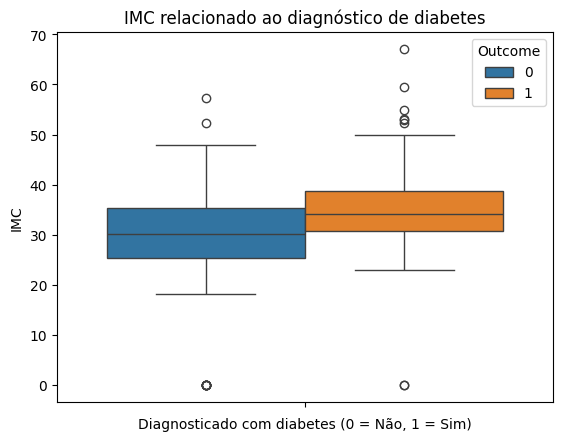

In [1697]:
sns.boxplot(df_diabetes, hue="Outcome", y = "BMI")
plt.title(f'IMC relacionado ao diagnóstico de diabetes')
plt.ylabel('IMC')
plt.xlabel("Diagnosticado com diabetes (0 = Não, 1 = Sim)")
plt.show()

#### Como é possível notar, a média do IMC das pessas com diabetes é maior que o das pessoas sem diabetes

## Questão 6

### Existe um valor específico de glicose que pode ser considerado crítico para o diagnóstico de diabetes? Utilize gráficos de dispersão e cálculos estatísticos para investigar esse ponto e definir um limite crítico, se possível.


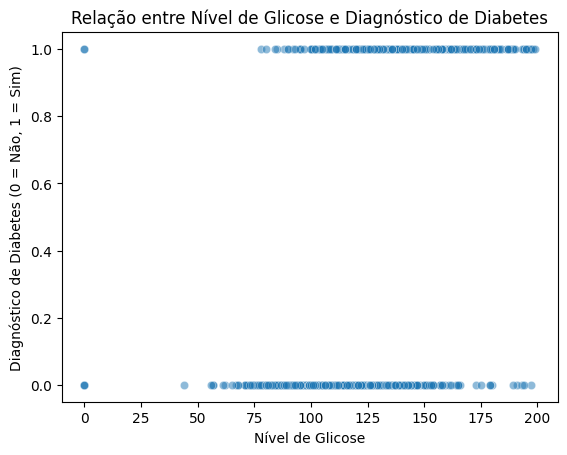

In [1698]:
sns.scatterplot(data=df_diabetes, x="Glucose", y="Outcome", alpha=0.5)
plt.xlabel("Nível de Glicose")
plt.ylabel("Diagnóstico de Diabetes (0 = Não, 1 = Sim)")
plt.title("Relação entre Nível de Glicose e Diagnóstico de Diabetes")
plt.show()

In [1699]:

media_glicose_diabeticos = df_diabetes[df_diabetes['Outcome'] == True]['Glucose'].mean()
media_glicose_nao_diabeticos = df_diabetes[df_diabetes['Outcome'] == False]['Glucose'].mean()

print(f"Média de glicose para pacientes com diabetes: {media_glicose_diabeticos:.2f}")
print(f"Média de glicose para pacientes sem diabetes: {media_glicose_nao_diabeticos:.2f}")

limite_critico = (media_glicose_diabeticos + media_glicose_nao_diabeticos) / 2
print(f"Limite crítico sugerido para glicose: {limite_critico:.2f}")

Média de glicose para pacientes com diabetes: 141.78
Média de glicose para pacientes sem diabetes: 109.75
Limite crítico sugerido para glicose: 125.77


## Questão 7

#### Treine um modelo de árvore de decisão para prever a presença de diabetes com base nas variáveis do dataset. Qual foi a acurácia obtida? Discuta os resultados e possíveis melhorias para o modelo

In [1700]:
X = df_diabetes.drop(columns='Outcome')
y = df_diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [1701]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)


In [1702]:
print("Confusion Matrix")
matrix = confusion_matrix(y_test, y_pred)
print(f"""
    F      T
F  {matrix[0][0]:<5}  {matrix[0][1]:<5}
T  {matrix[1][0]:<5}  {matrix[1][1]:<5}
""")

# Mede o quão frequente o modelo faz a previsão correta
# Acurácia = (TT+TF)/ (TT+FT+TF+FF)
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")

print("Classification Report")
print(classification_report(y_test, y_pred), end="\n\n")


Confusion Matrix

    F      T
F  105    27   
T  46     38   

Acurácia: 0.66
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.80      0.74       132
           1       0.58      0.45      0.51        84

    accuracy                           0.66       216
   macro avg       0.64      0.62      0.63       216
weighted avg       0.65      0.66      0.65       216




##### Os resultados mostram que o modelo não teve uma acurácia tão alta. Algumas melhorias poderiam ser feitas com pré-processamento de variáveis (como normalização e codificação) e remoção de algumas variáveis que não impactam muito o modelo.

## Questão 8

#### A variável DiabetesPedigreeFunction está relacionada à presença de diabetes? Pacientes com histórico familiar de diabetes apresentam maior risco? Realize uma análise exploratória e estatística para verificar essa relação.

Média de DiabetesPedigreeFunction para pacientes com diabetes: 510.562619047619
Média de DiabetesPedigreeFunction para pacientes sem diabetes: 378.6156623931624


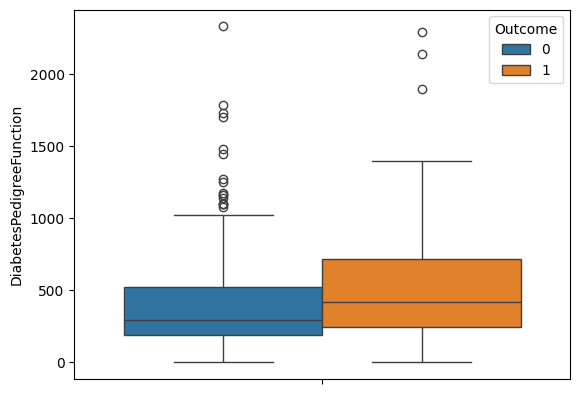

In [1703]:
sns.boxplot(data=df_diabetes, hue="Outcome", y="DiabetesPedigreeFunction")

media_diabeticos = df_diabetes[df_diabetes['Outcome'] == True]['DiabetesPedigreeFunction'].mean()
print(f"Média de DiabetesPedigreeFunction para pacientes com diabetes: {media_diabeticos}")

media_nao_diabeticos = df_diabetes[df_diabetes['Outcome'] == False]['DiabetesPedigreeFunction'].mean()
print(f"Média de DiabetesPedigreeFunction para pacientes sem diabetes: {media_nao_diabeticos}")

In [1704]:
correlation_test('DiabetesPedigreeFunction', 'Outcome')

Correlação entre DiabetesPedigreeFunction e Outcome: 0.18548


##### Os dados mostram que o histórico familiar tem uma correlação positiva muito baixa. Notasse também que as médias de DiabetesPedigreeFunction são bem maiores em pessoas com diabetes. Isso mostra que ela provavelmente é uma variável relevante para o treinamento do nosso modelo.

## Questão 9
#### Pacientes com mais de 50 anos têm taxas de diabetes mais altas do que pacientes mais jovens? Utilize estatísticas descritivas e gráficos comparativos para demonstrar as diferenças entre esses dois grupos etários.


In [1705]:
df_diabeteslte50 = df_diabetes[df_diabetes['Age'] <= 50]
df_diabetesgt50 = df_diabetes[df_diabetes['Age'] > 50]

taxa_diabetes_gt50 = df_diabetesgt50['Outcome'].mean() * 100
taxa_diabetes_lte50 = df_diabeteslte50['Outcome'].mean() * 100

print(f"Taxa de diabetes em pacientes com mais de 50 anos: {taxa_diabetes_gt50:.2f}%")
print(f"Taxa de diabetes em pacientes com 50 anos ou menos: {taxa_diabetes_lte50:.2f}%")

Taxa de diabetes em pacientes com mais de 50 anos: 46.15%
Taxa de diabetes em pacientes com 50 anos ou menos: 33.64%


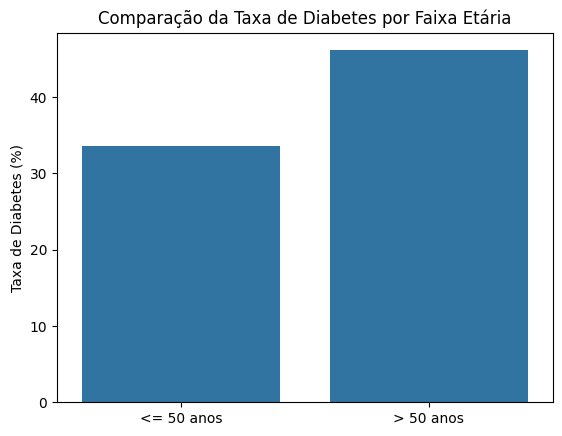

In [1706]:
sns.barplot(x=['<= 50 anos', '> 50 anos'], y=[taxa_diabetes_lte50, taxa_diabetes_gt50])
plt.ylabel('Taxa de Diabetes (%)')
plt.title('Comparação da Taxa de Diabetes por Faixa Etária')
plt.show()

#### Com isso, observa-se que nosso dataset tende a ter taxas de diabetes mais elevadas em pessoas com mais de 50 anos 

## Questão 10
#### Utilize regressão logística para estimar a probabilidade de um paciente ser diagnosticado com diabetes. Quais variáveis são mais influentes no modelo e como elas impactam a probabilidade de diagnóstico?


In [1707]:
X = df_diabetes.drop(columns=['Outcome'])
y = df_diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [1708]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1709]:
y_pred = log_reg_model.predict(X_test)

In [1710]:
# Features que mais influênciaram a decisão do modelo
coefs = pd.DataFrame({
    'feature': X.columns,
    'coefficient': log_reg_model.coef_[0]
})
coefs['abs_coef'] = np.abs(coefs['coefficient'])
coefs = coefs.sort_values(by='abs_coef', ascending=False)

# Coeficientes positivos: aumentam a probabilidade do modelo prever a classe positiva.
# Coeficientes negativos: diminuem essa probabilidade.
# Quanto maior o valor absoluto do coeficiente, mais influência a variável tem na decisão
coefs[['feature', 'coefficient']]

,feature,coefficient
0,Pregnancies,0.085030
2,BloodPressure,-0.027423
1,Glucose,0.017161
7,Age,-0.012005
5,BMI,-0.008238
3,SkinThickness,0.008011
4,Insulin,0.000659
6,DiabetesPedigreeFunction,-0.000029


In [1711]:
print("Confusion Matrix")
matrix = confusion_matrix(y_test, y_pred)
print(f"""
    F      T
F  {matrix[0][0]:<5}  {matrix[0][1]:<5}
T  {matrix[1][0]:<5}  {matrix[1][1]:<5}
""")

# Mede o quão frequente o modelo faz a previsão correta
# Acurácia = (TT+TF)/ (TT+FT+TF+FF)
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")

print("Classification Report")
print(classification_report(y_test, y_pred), end="\n\n")


Confusion Matrix

    F      T
F  122    19   
T  43     32   

Acurácia: 0.71
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       141
           1       0.63      0.43      0.51        75

    accuracy                           0.71       216
   macro avg       0.68      0.65      0.65       216
weighted avg       0.70      0.71      0.70       216




## Questão 11
#### Quais técnicas de feature engineering podem ser aplicadas para melhorar a previsão do diagnóstico de diabetes utilizando modelos de aprendizado de máquina? Experimente transformar variáveis existentes, criar novas variáveis a partir de combinações ou interações e utilize técnicas como encoding, normalização ou transformação de características. Avalie o impacto dessas mudanças no desempenho de um modelo de aprendizado de máquina (por exemplo, Random Forest ou XGBoost)

#### Para melhorar a previsão do diagnóstico, utilizaremos algumas táticas de feature engineering a seguir:


In [1712]:
#One-Hot encoding na variável "Pregnancies"
df_diabetes = pd.get_dummies(df_diabetes, columns=["Pregnancies"], drop_first=True)

for column in df_diabetes.columns:
    if (column.startswith("Pregnancies")):
        df_diabetes[column] = df_diabetes[column].astype(int)

In [1713]:
# Normalização de variaveis não-discretas 
to_normalize_features = ["BloodPressure", "Glucose", "SkinThickness", "Insulin", "BMI"]

for column in to_normalize_features:
    df_diabetes[column] = normalize(df_diabetes[[column]], axis=0).flatten()

In [1714]:
df_diabetes

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_1,Pregnancies_2,...,Pregnancies_7,Pregnancies_8,Pregnancies_9,Pregnancies_10,Pregnancies_11,Pregnancies_12,Pregnancies_13,Pregnancies_14,Pregnancies_15,Pregnancies_17
0,0.044049,0.037577,0.049984,0.000000,0.037987,627.00,50,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.025298,0.034445,0.041415,0.000000,0.030073,351.00,31,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.054465,0.033402,0.000000,0.000000,0.026342,672.00,32,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0.026489,0.034445,0.032846,0.024966,0.031769,167.00,21,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.040775,0.020876,0.049984,0.044620,0.048727,2288.00,33,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.030060,0.039664,0.068549,0.047807,0.037196,171.00,63,0,0,0,...,0,0,0,1,0,0,0,0,0,0
764,0.036310,0.036533,0.038559,0.000000,0.041605,0.34,27,0,0,1,...,0,0,0,0,0,0,0,0,0,0
765,0.036013,0.037577,0.032846,0.029747,0.029621,245.00,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0
766,0.037501,0.031314,0.000000,0.000000,0.034030,349.00,47,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [1715]:
# Pelo dataset ser não ser tão grande, foi escolhido deixar 75% do dataset para treino
X = df_diabetes.drop(columns="Outcome")
y = df_diabetes["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [1716]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [1717]:
y_pred = random_forest.predict(X_test)


In [1718]:
print("Confusion Matrix")
matrix = confusion_matrix(y_test, y_pred)
print(f"""
    F      T
F  {matrix[0][0]:<5}  {matrix[0][1]:<5}
T  {matrix[1][0]:<5}  {matrix[1][1]:<5}
""")

# Mede o quão frequente o modelo faz a previsão correta
# Acurácia = (TT+TF)/ (TT+FT+TF+FF)
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}", end="\n\n")

print("Classification Report")
print(classification_report(y_test, y_pred), end="\n\n")


Confusion Matrix

    F      T
F  103    18   
T  25     34   

Acurácia: 0.76

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       121
           1       0.65      0.58      0.61        59

    accuracy                           0.76       180
   macro avg       0.73      0.71      0.72       180
weighted avg       0.76      0.76      0.76       180




#### Após finalizar o treinamento do modelo de Random Forest com feature engineering, observa-se que ele tende a ser mais ligeiramente mais preciso que os outros modelos apresentados nesse relatório

###### One-hot encoding: houver variáveis categóricas essa técnica converte cada categoria em uma coluna binária. Isso evita que o modelo interprete erroneamente uma ordem ou distância entre as categorias e permite que algoritmos que não lidam nativamente com dados categóricos processem essas informações corretamente.

###### Normalização: ao padronizar as escalas dos atributos, a normalização impede que variáveis com amplitude maior dominem a função de custo, o que é fundamental para algoritmos baseados em gradiente e métodos que utilizam distâncias. Desta forma, garante melhor convergência durante o treinamento e, em geral, melhora a performance do modelo.

#### Como se pode observar, isso faz as variáveis Glucose, BMI e Age impactarem mais no modelo que previamente

In [1719]:
# Features que mais influênciaram a decisão do modelo
coefs = pd.DataFrame({
    'feature': X.columns,
    'coefficient': random_forest.feature_importances_
})
coefs['abs_coef'] = np.abs(coefs['coefficient'])
coefs = coefs.sort_values(by='abs_coef', ascending=False)
coefs[['feature', 'coefficient']]

,feature,coefficient
0,Glucose,0.238563
4,BMI,0.148923
5,DiabetesPedigreeFunction,0.135896
6,Age,0.128671
1,BloodPressure,0.089336
3,Insulin,0.079323
2,SkinThickness,0.065314
7,Pregnancies_1,0.017478
13,Pregnancies_7,0.011725
10,Pregnancies_4,0.011363
